In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


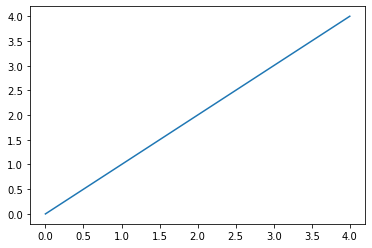

In [2]:
plt.plot(np.arange(5))

In [58]:
#Reading training data set
df= pd.read_csv("/home/tanvi/Documents/Machine_Learning/practice_notebooks/AnalyticsVidhya/Loan Prediction III/train_ctrUa4K.csv")

In [52]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [14]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#Method 1 : Fill missing value by mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


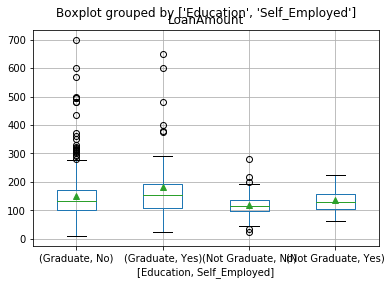

In [12]:
#Method 2 : Fill missing value using other values
df.boxplot(column="LoanAmount", by=["Education", "Self_Employed"], showmeans= True)

In [15]:
#Step 1: Fill missing values in "other value" , here Self_Employed
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [59]:
df['Self_Employed'].fillna('No', inplace=True)
df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [60]:
#Step2 : fill LoanAmount missing values by median
table = df.pivot_table(values="LoanAmount", index= "Self_Employed", columns="Education", aggfunc= np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [61]:
def fillLoanAmount(x):
    return table.at[x['Self_Employed'], x['Education']]

#Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fillLoanAmount, axis=1), inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


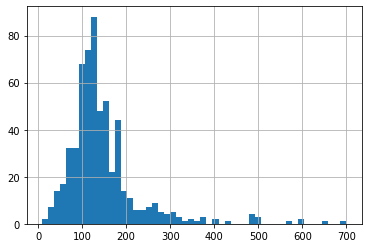

In [15]:
df['LoanAmount'].hist(bins=50)

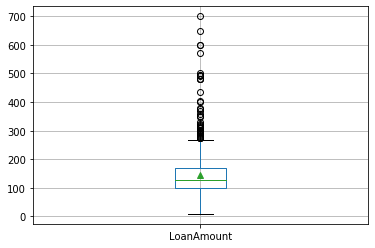

In [16]:
df.boxplot(column='LoanAmount', showmeans= True)

In [62]:
#Nullifying extreme value effect of LoanAmount by taking log
df['LoanAmount_log']= np.log(df['LoanAmount'])

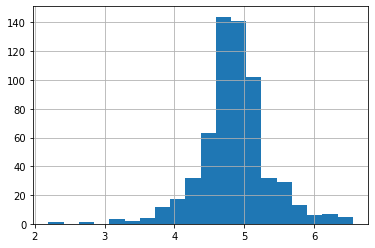

In [65]:
df['LoanAmount_log'].hist(bins=20)

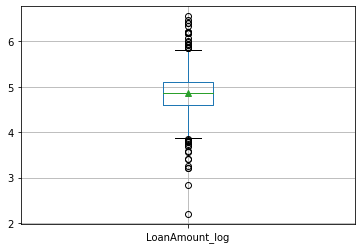

In [64]:
df.boxplot(column='LoanAmount_log', showmeans= True)

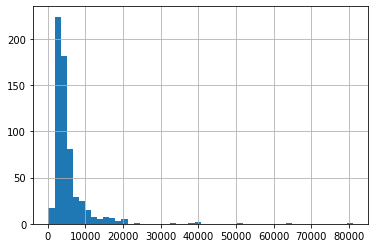

In [7]:
df['ApplicantIncome'].hist(bins=50)

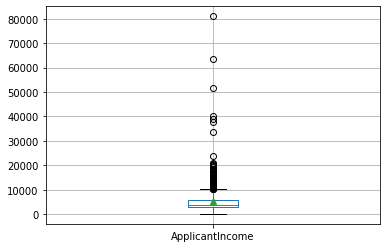

In [13]:
df.boxplot(column='ApplicantIncome', showmeans= True)

In [66]:
df['TotalIncome'] = df['ApplicantIncome']+ df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])

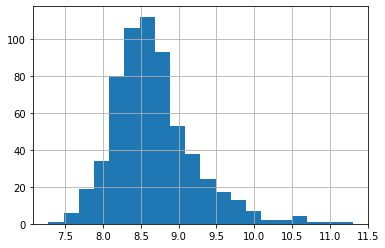

In [67]:
df['TotalIncome_log'].hist(bins=20)

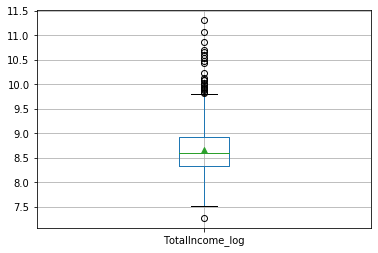

In [68]:
df.boxplot(column='TotalIncome_log', showmeans= True)

## Fill categorical data

In [84]:
#1. Gender
df[df['Gender'].isnull()]
df['Gender'].value_counts()
df['Gender'].fillna('Male', inplace= True)
df.iloc[23, :]

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status, LoanAmount_log, TotalIncome, TotalIncome_log]
Index: []


Loan_ID                  LP001050
Gender                       Male
Married                       Yes
Dependents                      2
Education            Not Graduate
Self_Employed                  No
ApplicantIncome              3365
CoapplicantIncome            1917
LoanAmount                    112
Loan_Amount_Term              360
Credit_History                  0
Property_Area               Rural
Loan_Status                     N
LoanAmount_log             4.7185
TotalIncome                  5282
TotalIncome_log           8.57206
Name: 23, dtype: object

In [88]:
#2. Married
df[df['Married'].isnull()] # only 3 records
# df['Married'].value_counts()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y,5.075174,4570.0,8.427268
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y,5.062595,4758.0,8.467583
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,130.0,240.0,1.0,Semiurban,Y,4.867534,10047.0,9.215029


In [134]:
#2. Dependents
df[df['Dependents'].isnull()]
temp= df['Dependents'].value_counts()
temp.apply(lambda x : x/temp.sum()) # Probablity


0     0.586319
1     0.166124
2     0.164495
3+    0.083062
Name: Dependents, dtype: float64

In [116]:
df['Dependents'].fillna('0', inplace=True)
df[df['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log


In [121]:
#2. Loan_Amount_Term
df[df['Loan_Amount_Term'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
19,LP001041,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y,4.744932,6100.0,8.716044
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N,4.605170,3158.0,8.057694
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y,4.564348,4695.0,8.454253
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y,4.477337,3410.0,8.134468
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N,4.553877,4755.0,8.466952
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N,5.023881,7686.0,8.947156
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y,5.204007,6873.0,8.835356
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y,4.787492,4272.0,8.359837
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y,5.164786,8588.0,9.058121
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y,4.787492,5787.0,8.663369


In [122]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [123]:
df['Loan_Amount_Term'].fillna(360, inplace=True)
df[df['Loan_Amount_Term'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log


In [127]:
#2. Credit_History
df[df['Credit_History'].isnull()]
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [129]:
df['Credit_History'].fillna(1, inplace=True)

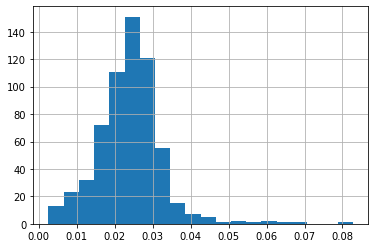

In [133]:
## Adding column for more information
df['Payback_probab'] = df['LoanAmount'] /df['TotalIncome']
df['Payback_probab'].hist(bins=20)